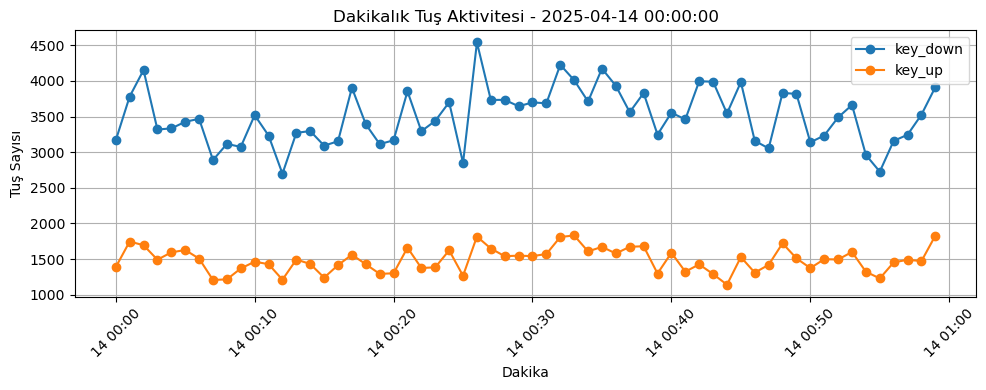

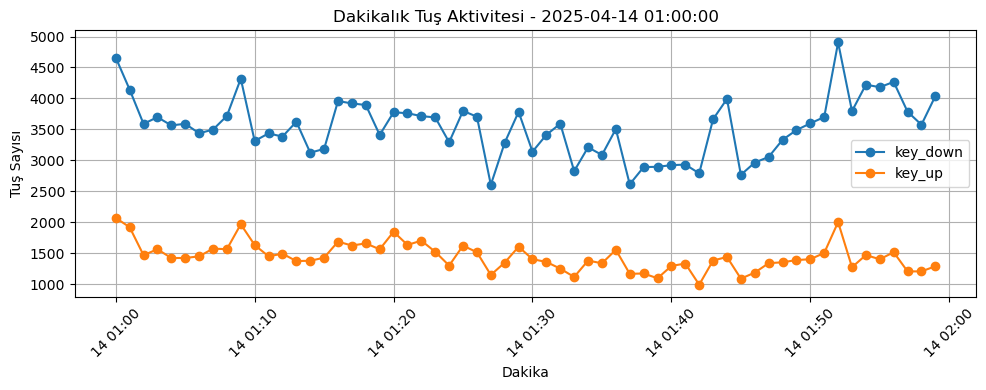

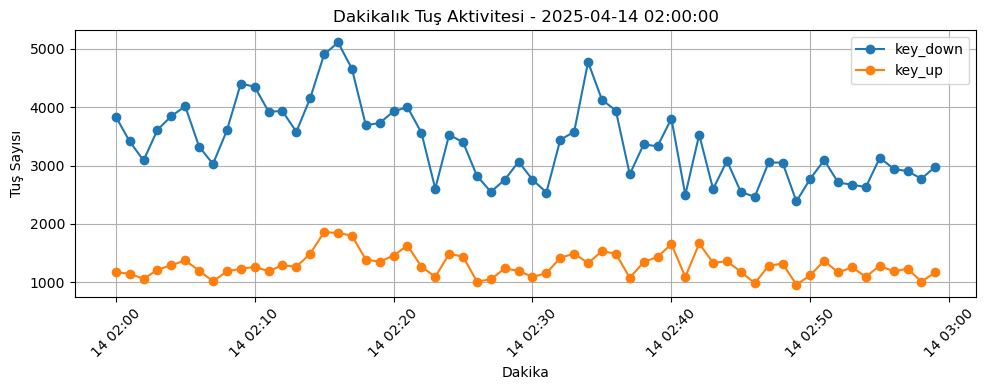

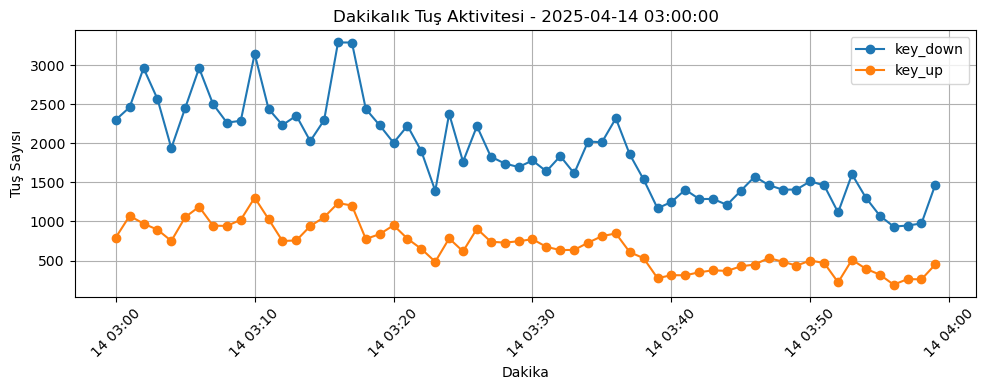

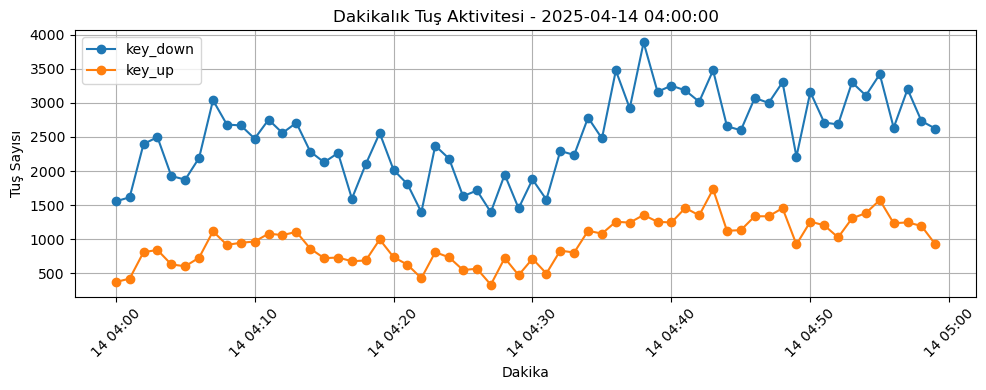

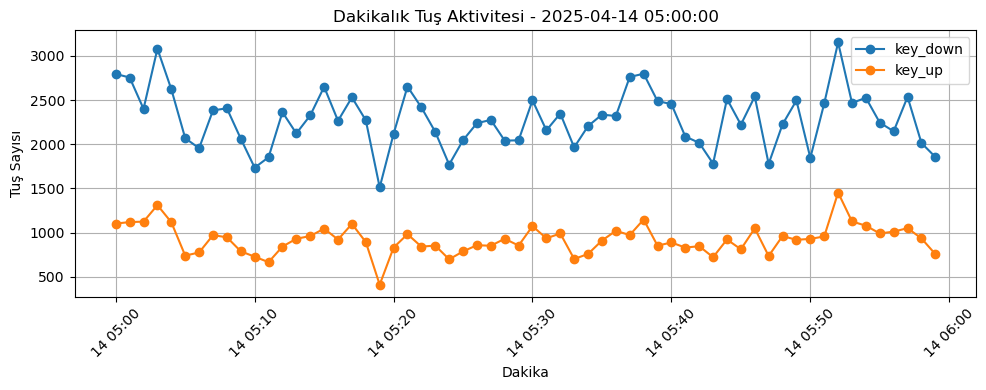

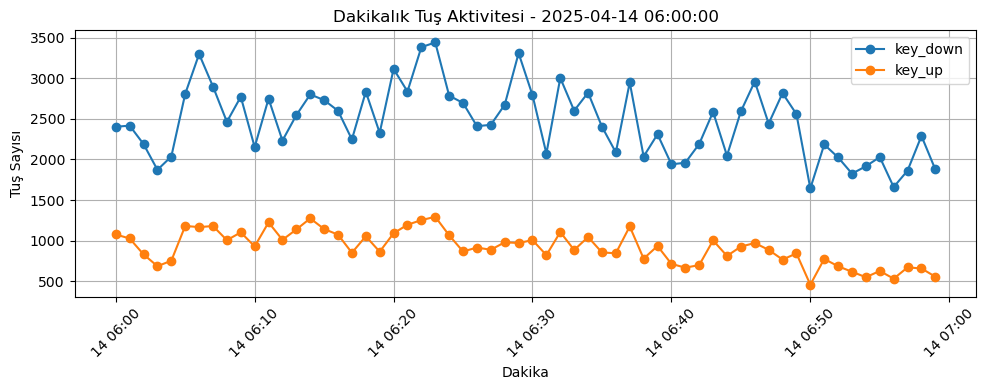

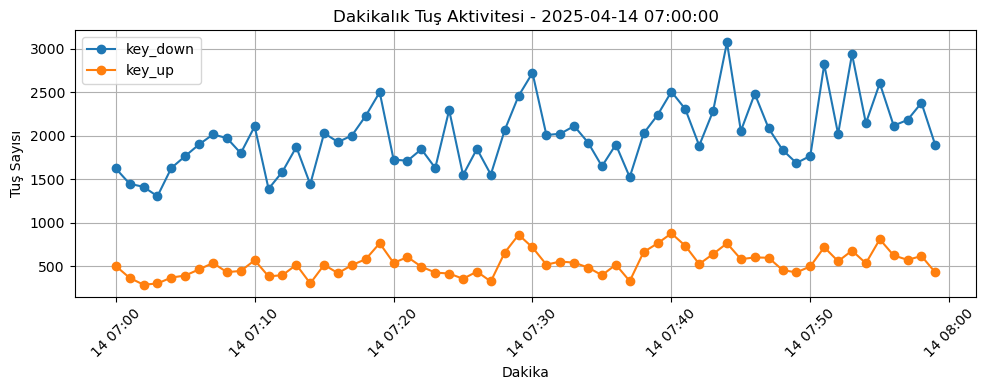

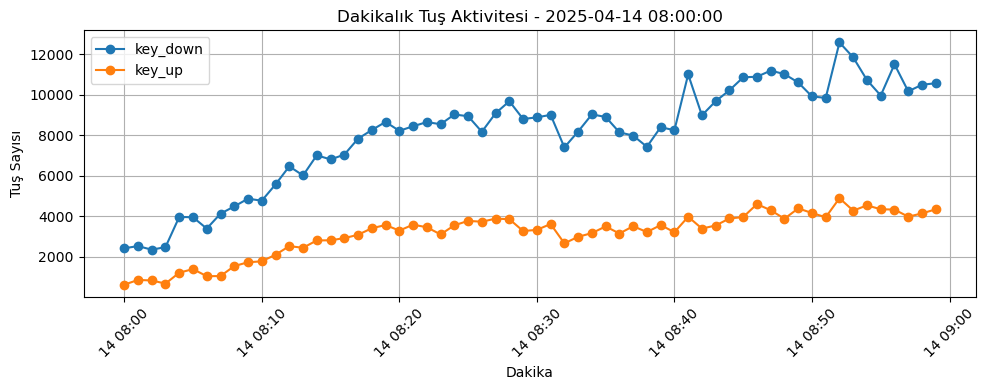

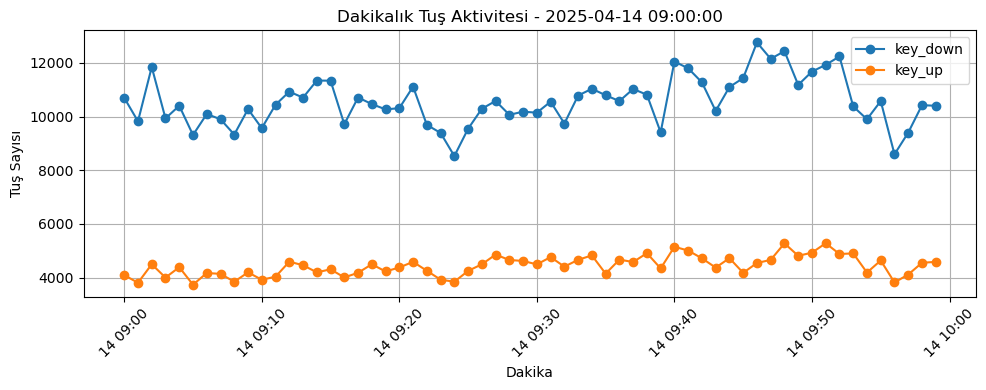

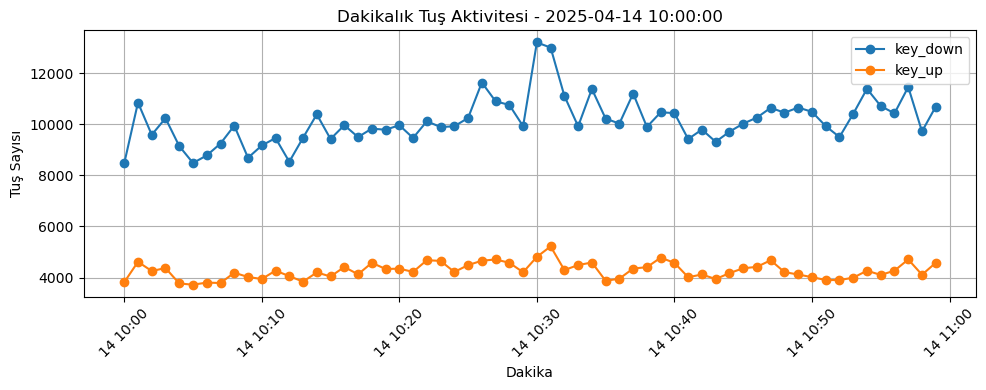

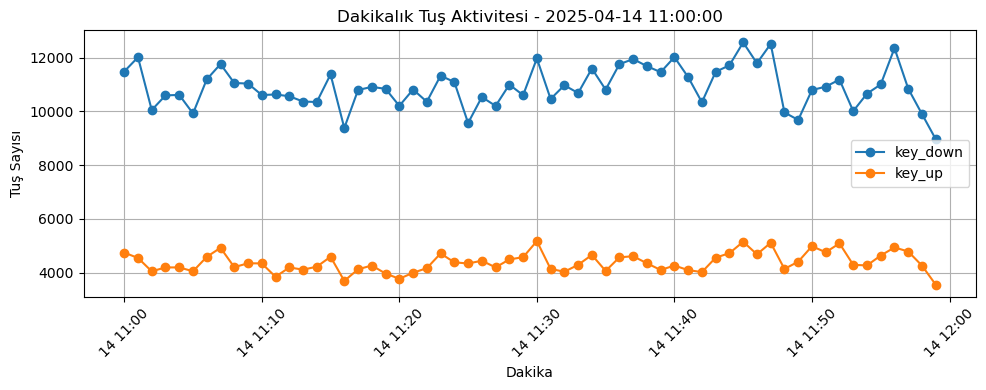

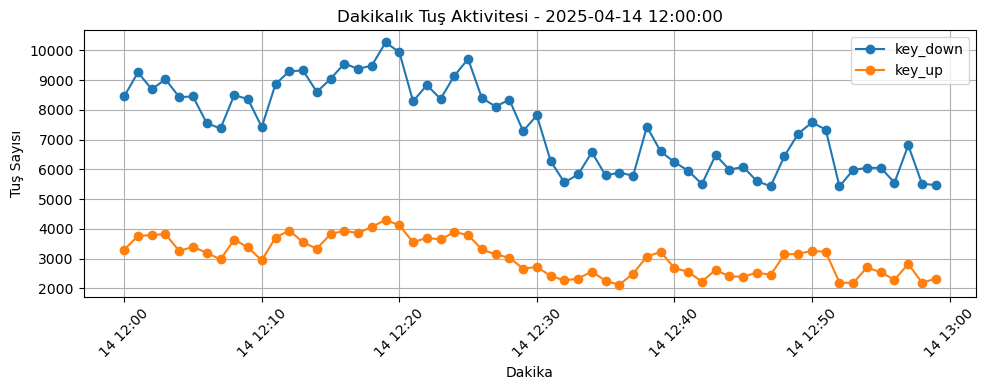

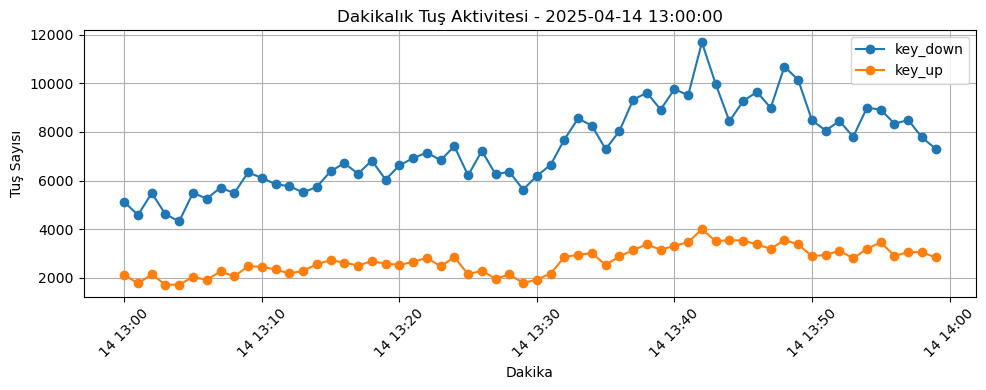

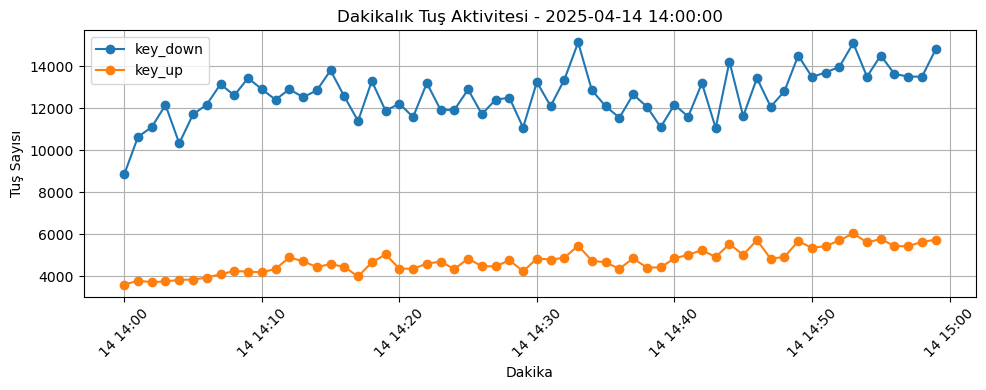

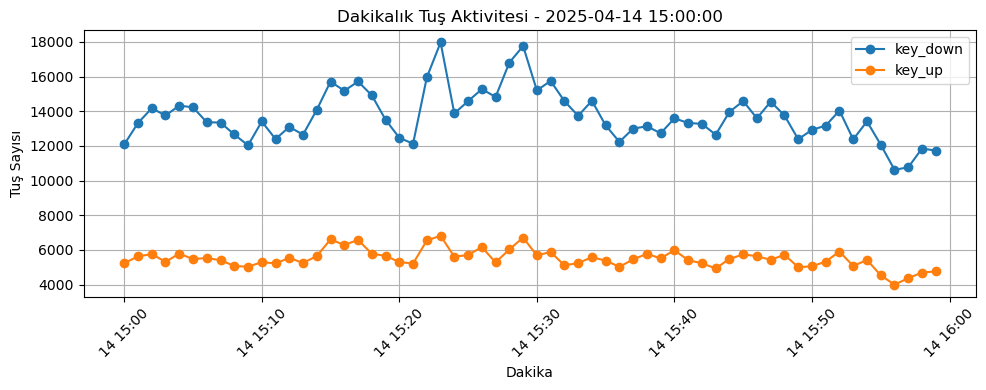

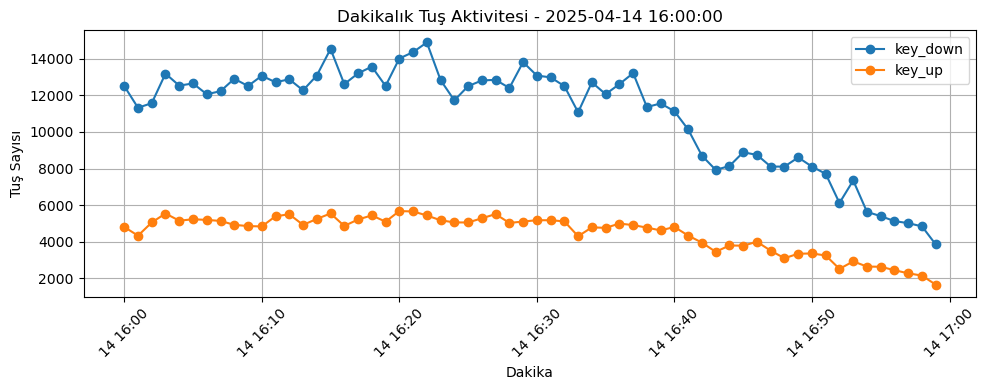

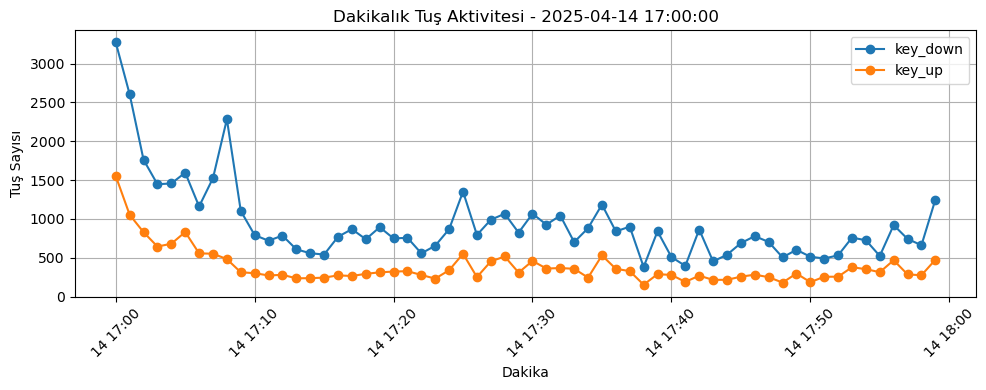

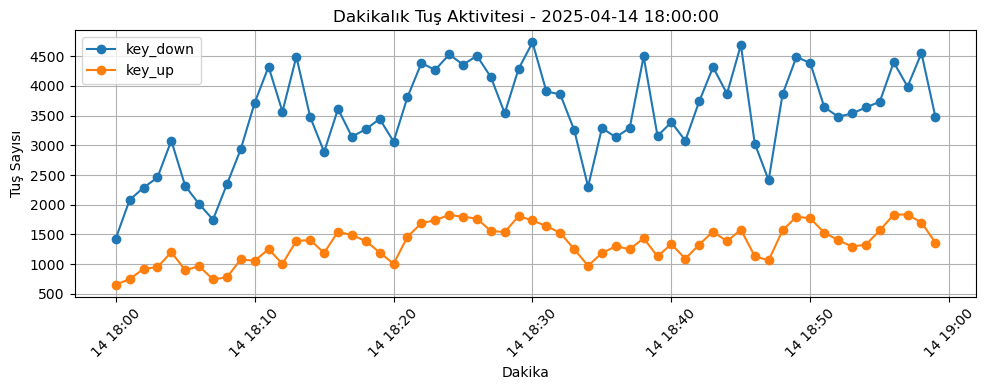

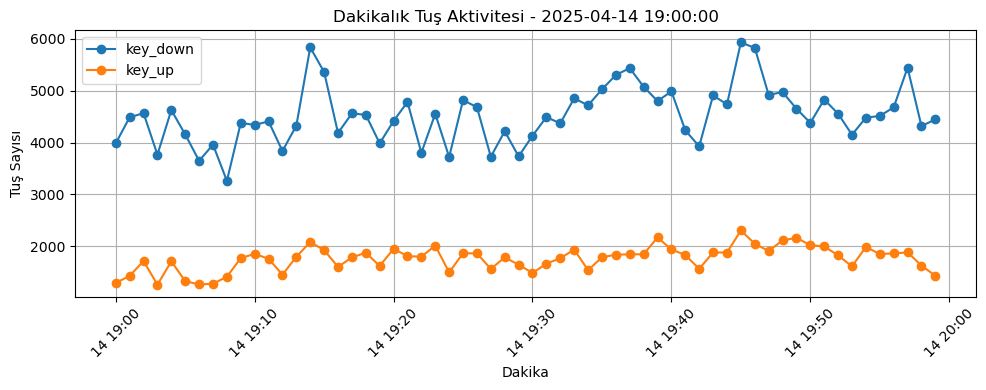

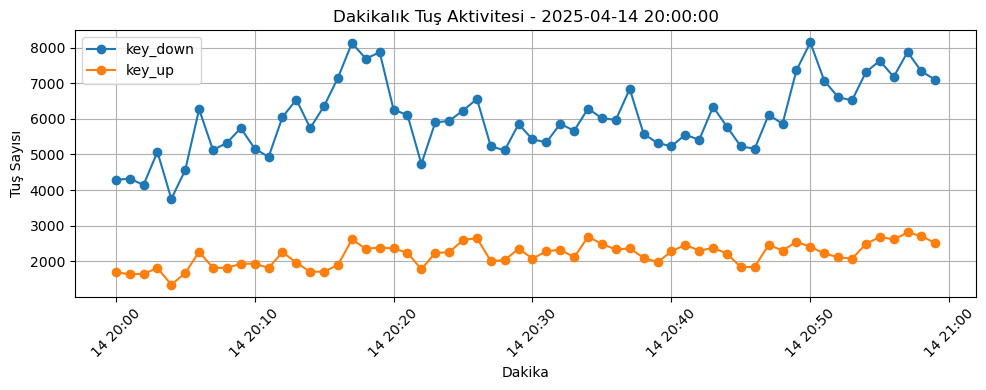

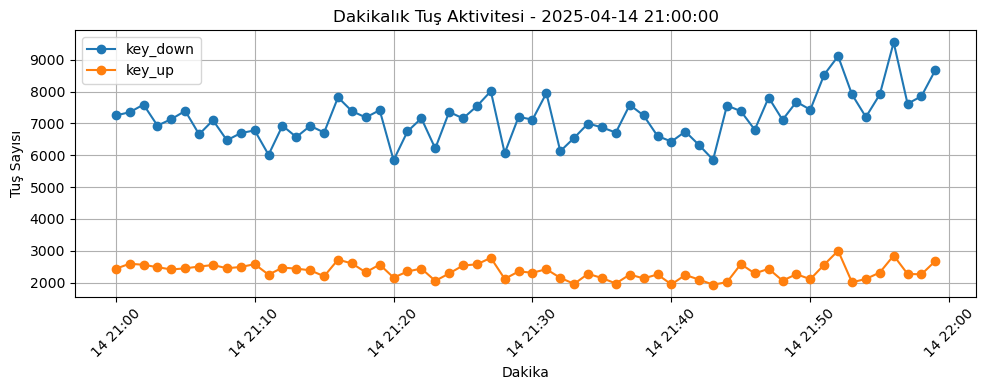

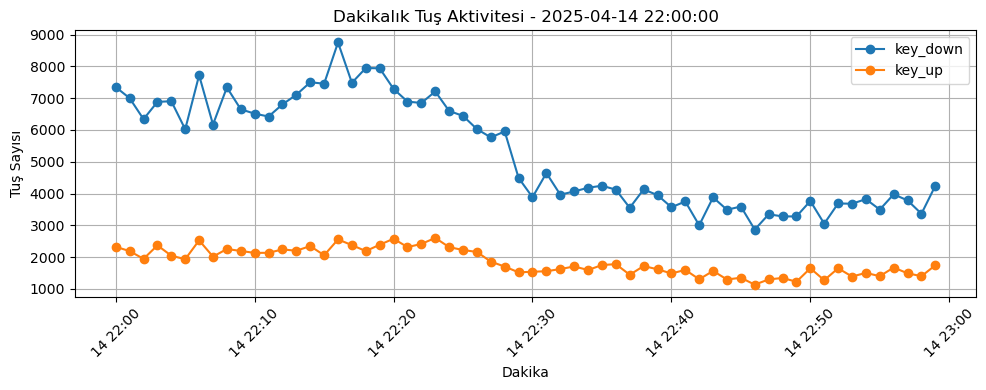

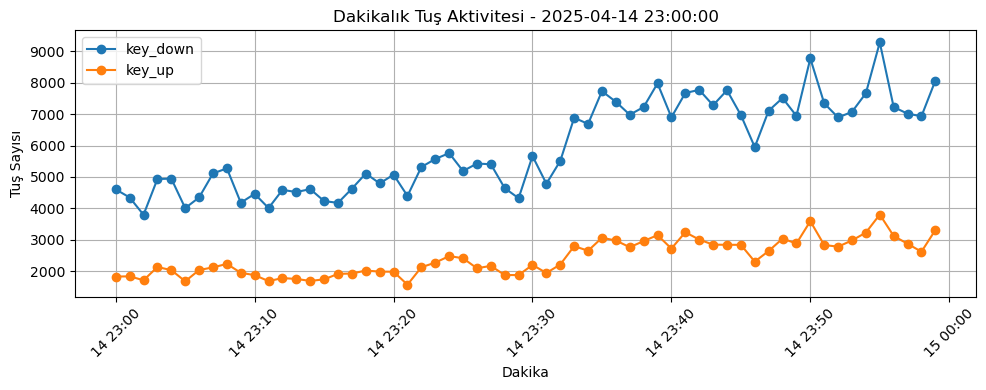

In [4]:

import pandas as pd
import matplotlib.pyplot as plt

# CSV dosya yolunu girin
csv_path = "C:/store/git/km-stat-activity/data/real/real_activity_log.csv"

# Veriyi yükle
df = pd.read_csv(csv_path)

# Zamanı işle
df["start_date_time"] = pd.to_datetime(df["start_date_time"], errors="coerce")
df = df[df["start_date_time"].notna()]
df["hour"] = df["start_date_time"].dt.floor("h")
df["minute"] = df["start_date_time"].dt.floor("min")

# Her saat için dakikalık key_down ve key_up grafiği çiz
unique_hours = df["hour"].sort_values().unique()

for hour in unique_hours:
    df_hour = df[df["hour"] == hour]
    minute_summary = df_hour.groupby("minute")[["key_down", "key_up"]].sum().reset_index()

    if minute_summary.empty:
        continue

    plt.figure(figsize=(10, 4))
    plt.plot(minute_summary["minute"], minute_summary["key_down"], label="key_down", marker='o')
    plt.plot(minute_summary["minute"], minute_summary["key_up"], label="key_up", marker='o')
    plt.title(f"Dakikalık Tuş Aktivitesi - {hour}")
    plt.xlabel("Dakika")
    plt.ylabel("Tuş Sayısı")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
